## Imports

In [1]:
!pip install pandas numpy matplotlib seaborn sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from google.colab import files

sns.set_theme(style="whitegrid")
palette = "Set2"

sns.set_context("paper")

#Preprocessing the dataset

In [3]:
df = pd.read_excel('/content/drive/MyDrive/BA thesis/ClimateChange_1st_annotated.xlsx')

In [4]:
df['bias_name'] = np.nan

In [5]:
df.columns =['full_text_id', 'conversation_id', 'source', 'full_text',	'sentence', 'No_pathos','Contains_pathos', 'positive_valence', 'negative_valence', 'unsure', 'context_dependent', 'opposite', 'humour', 'comment_url', 'comment_id', 'affect_h', 'availability_h', 'representativeness_h', 'attentional_b', 'confirmation_b', 'status_quo_b', 'bias_name']

In [6]:
df.head(3)

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,humour,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.0,0.0,0.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,wxmvx9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.0,1.0,1.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrxe43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.5,0.5,0.0,0.0,0.5,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrziau,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
columns_to_convert = ['affect_h', 'availability_h', 'representativeness_h', 'attentional_b', 'confirmation_b', 'status_quo_b']


In [8]:
# fill NaN with 0.0

df = df.fillna(0)

In [9]:
df[columns_to_convert] =  df[columns_to_convert].apply(pd.to_numeric, downcast ='signed')

In [10]:
df.head(3)

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,humour,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.0,0.0,0.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,wxmvx9,0,0,0,0,0,0,0.0
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.0,1.0,1.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrxe43,0,0,0,0,0,0,0.0
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.5,0.5,0.0,0.0,0.5,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrziau,0,0,0,0,0,0,0.0


In [11]:
# checking for blanks

df.isnull().sum()

full_text_id            0
conversation_id         0
source                  0
full_text               0
sentence                0
No_pathos               0
Contains_pathos         0
positive_valence        0
negative_valence        0
unsure                  0
context_dependent       0
opposite                0
humour                  0
comment_url             0
comment_id              0
affect_h                0
availability_h          0
representativeness_h    0
attentional_b           0
confirmation_b          0
status_quo_b            0
bias_name               0
dtype: int64

#Creating columnn 'bias_name'





In [12]:
columns_to_check = ['affect_h', 'availability_h', 'representativeness_h', 'attentional_b', 'confirmation_b', 'status_quo_b']

In [13]:
df['bias_name'] = df[columns_to_check].apply(lambda row: next((col for col, val in row.items() if val == 1), 'no bias'), axis=1)

In [14]:
df

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,humour,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.000000,0.000000,0.0,0.000000,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,wxmvx9,0,0,0,0,0,0,no bias
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.000000,1.000000,1.0,0.000000,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrxe43,0,0,0,0,0,0,no bias
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.500000,0.500000,0.0,0.000000,0.5,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrziau,0,0,0,0,0,0,no bias
3,3,wxmvx9,Carniboy,"good idea, next step ban the almonds, they are...","good idea, next step ban the almonds, they are...",0.000000,1.000000,0.0,1.000000,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ils717g,0,0,0,0,0,0,no bias
4,7,ils717g,Medeski,While I know almonds are terrible for the amou...,While I know almonds are terrible for the amou...,1.000000,0.000000,0.0,0.000000,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ils7qpp,0,0,0,0,0,0,no bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,1667,1563755550575587072,Anthony65181997,@ellymelly All the batteries will be recycled ...,@ellymelly All the batteries will be recycled ...,1.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,0,no bias
2464,1668,1563755550575587072,TankVaxxed,@ellymelly Yeah right. Have you got a crystal ...,"Have you got a crystal ball, is your middle na...",0.666667,0.333333,0.0,0.333333,0.0,...,0.0,0,0,0,0,0,0,0,0,no bias
2465,1669,1563755550575587072,ChrisSleven,"@ellymelly 100% virtue signalling, zero logic.","@ellymelly 100% virtue signalling, zero logic.",0.000000,1.000000,0.0,1.000000,0.0,...,0.0,0,0,0,0,0,0,0,0,no bias
2466,1670,1563755550575587072,Chewy_Bravo,"@ellymelly Solar panels can be recycled, there...",But 2050 there will be enough.,1.000000,0.000000,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,0,no bias


In [15]:
# checking if some posts include more than 1 bias and making copy
df_copy = df.copy()

for index, row in df.iterrows():
  indices = [col for col in columns_to_check if row[col] == 1]

  if len(indices) > 1:
    number_of_copies = len(indices) - 1

    while number_of_copies > 0:
      row_copy = row.copy()
      row_copy['bias_name'] = indices[-abs(number_of_copies)]
      df_copy = pd.concat([df_copy, row_copy.to_frame().T], ignore_index=True)

      number_of_copies -= 1

  indices = []


In [16]:
df_copy

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,humour,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.0,0.0,0.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,wxmvx9,0,0,0,0,0,0,no bias
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.0,1.0,1.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrxe43,0,0,0,0,0,0,no bias
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.5,0.5,0.0,0.0,0.5,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ilrziau,0,0,0,0,0,0,no bias
3,3,wxmvx9,Carniboy,"good idea, next step ban the almonds, they are...","good idea, next step ban the almonds, they are...",0.0,1.0,0.0,1.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ils717g,0,0,0,0,0,0,no bias
4,7,ils717g,Medeski,While I know almonds are terrible for the amou...,While I know almonds are terrible for the amou...,1.0,0.0,0.0,0.0,0.0,...,0.0,/r/climatechange/comments/wxmvx9/california_to...,ils7qpp,0,0,0,0,0,0,no bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1002,1561325662329359872,PonsSublicius,@2CynicAl65 I'm (barely) old enough to remembe...,@2CynicAl65 I'm (barely) old enough to remembe...,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,1,0,1,0,confirmation_b
2473,1072,1561327010567361024,emublood,@LoyalTeddy1872 @MikeHudema The news is my mai...,@LoyalTeddy1872 @MikeHudema The news is my mai...,0.75,0.25,0.0,0.25,0.0,...,0.0,0,0,0,0,0,1,1,0,confirmation_b
2474,1469,1563127334466507008,chris_surano,@GeraldKutney Is that the same type of science...,@GeraldKutney Is that the same type of science...,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,1,0,1,0,confirmation_b
2475,1556,1563128086563983104,ManthropologyUK,@Jannatu18076413 @GretaThunberg @SaleemulHuq2 ...,You blame MY generation 4 climate change yet w...,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,1,0,confirmation_b


#Descriptive statistic

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   full_text_id          2477 non-null   object
 1   conversation_id       2477 non-null   object
 2   source                2477 non-null   object
 3   full_text             2477 non-null   object
 4   sentence              2477 non-null   object
 5   No_pathos             2477 non-null   object
 6   Contains_pathos       2477 non-null   object
 7   positive_valence      2477 non-null   object
 8   negative_valence      2477 non-null   object
 9   unsure                2477 non-null   object
 10  context_dependent     2477 non-null   object
 11  opposite              2477 non-null   object
 12  humour                2477 non-null   object
 13  comment_url           2477 non-null   object
 14  comment_id            2477 non-null   object
 15  affect_h              2477 non-null   

In [18]:
df_copy.bias_name.describe()

count        2477
unique          7
top       no bias
freq         2196
Name: bias_name, dtype: object

In [19]:
df_copy.bias_name.value_counts()

no bias                 2196
confirmation_b            91
representativeness_h      61
attentional_b             41
availability_h            41
affect_h                  25
status_quo_b              22
Name: bias_name, dtype: int64

# Barplots

### Countplot - no bias + types of biases

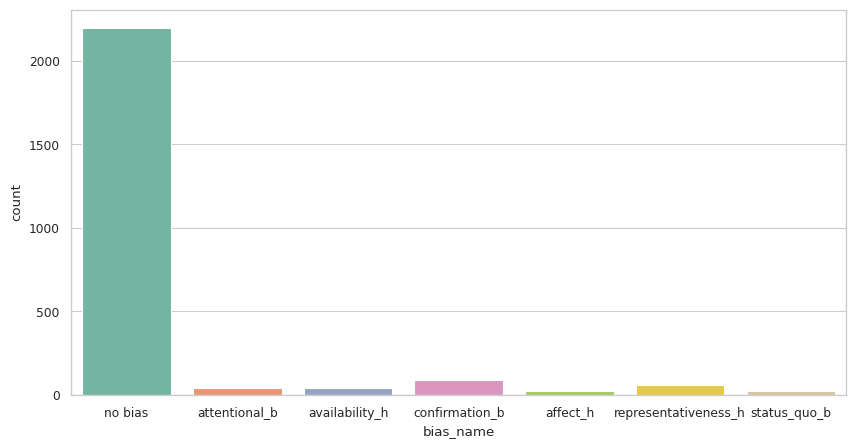

In [ ]:
plt.figure(figsize=(10,5))

number_nones_and_types = sns.countplot(x='bias_name', data=df_copy, palette=palette)

plt.show()

### Countplot - if the bias is present

In [ ]:
# create new column - 'bias_mapped'

mapping = {'no bias':'no_bias',
           'affect_h':'present_bias',
           'availability_h': 'present_bias',
           'representativeness_h':'present_bias',
           'attentional_b':'present_bias',
           'confirmation_b':'present_bias',
           'status_quo_b':'present_bias'}

df_copy['bias_mapped'] = df_copy.bias_name.map(mapping)

df_copy

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wxmvx9/california_to...,wxmvx9,0,0,0,0,0,0,no bias,no_bias
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.0,1.0,1.0,0.0,0.0,...,/r/climatechange/comments/wxmvx9/california_to...,ilrxe43,0,0,0,0,0,0,no bias,no_bias
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.5,0.5,0.0,0.0,0.5,...,/r/climatechange/comments/wxmvx9/california_to...,ilrziau,0,0,0,0,0,0,no bias,no_bias
3,3,wxmvx9,Carniboy,"good idea, next step ban the almonds, they are...","good idea, next step ban the almonds, they are...",0.0,1.0,0.0,1.0,0.0,...,/r/climatechange/comments/wxmvx9/california_to...,ils717g,0,0,0,0,0,0,no bias,no_bias
4,7,ils717g,Medeski,While I know almonds are terrible for the amou...,While I know almonds are terrible for the amou...,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wxmvx9/california_to...,ils7qpp,0,0,0,0,0,0,no bias,no_bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1002,1561325662329359872,PonsSublicius,@2CynicAl65 I'm (barely) old enough to remembe...,@2CynicAl65 I'm (barely) old enough to remembe...,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,confirmation_b,present_bias
2473,1072,1561327010567361024,emublood,@LoyalTeddy1872 @MikeHudema The news is my mai...,@LoyalTeddy1872 @MikeHudema The news is my mai...,0.75,0.25,0.0,0.25,0.0,...,0,0,0,0,0,1,1,0,confirmation_b,present_bias
2474,1469,1563127334466507008,chris_surano,@GeraldKutney Is that the same type of science...,@GeraldKutney Is that the same type of science...,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,confirmation_b,present_bias
2475,1556,1563128086563983104,ManthropologyUK,@Jannatu18076413 @GretaThunberg @SaleemulHuq2 ...,You blame MY generation 4 climate change yet w...,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,confirmation_b,present_bias


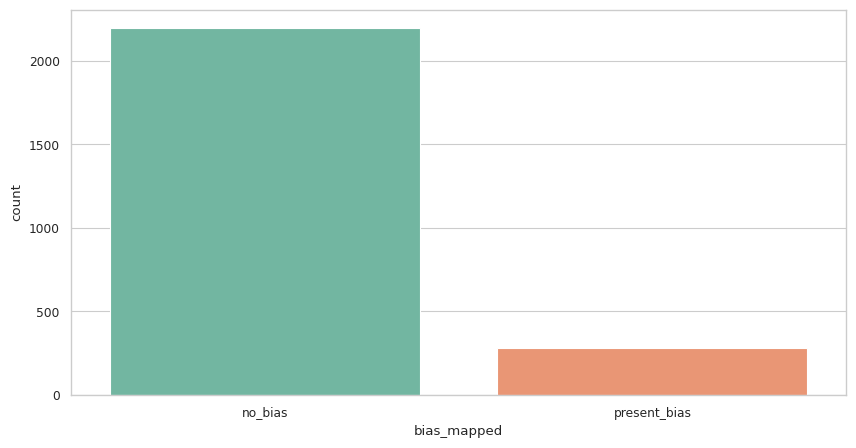

In [ ]:
plt.figure(figsize=(10,5))

bias_presence = sns.countplot(x='bias_mapped', data=df_copy, palette=palette)

plt.show()

In [ ]:
df_copy['bias_mapped'].value_counts()

no_bias         2196
present_bias     281
Name: bias_mapped, dtype: int64

### Countplot - types of biases

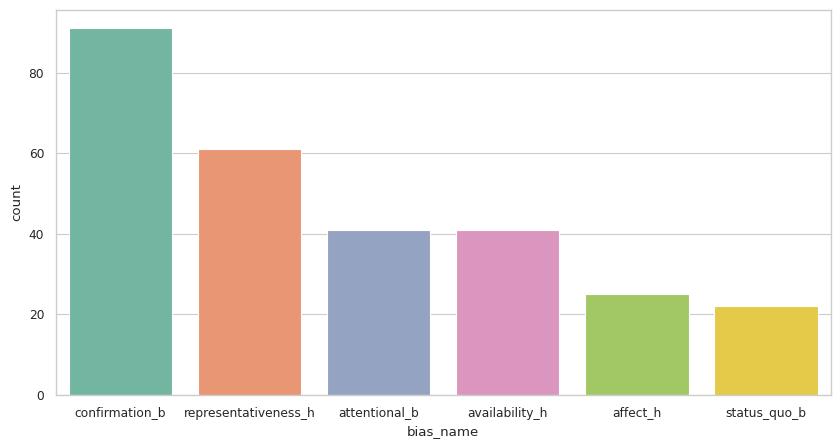

In [ ]:
plt.figure(figsize=(10,5))

number_of_types = sns.countplot(x='bias_name', order=df_copy['bias_name'].value_counts().iloc[1:].index, data=df_copy, palette=palette)


plt.show()

### Crosstab - presence of pathos and biases

In [ ]:
df_copy['pathos_presence'] = df_copy['Contains_pathos'] >= df_copy['No_pathos']

In [ ]:
df_copy.head(3)

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.0,0.0,0.0,0.0,0.0,...,wxmvx9,0,0,0,0,0,0,no bias,no_bias,False
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.0,1.0,1.0,0.0,0.0,...,ilrxe43,0,0,0,0,0,0,no bias,no_bias,True
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.5,0.5,0.0,0.0,0.5,...,ilrziau,0,0,0,0,0,0,no bias,no_bias,True


In [ ]:
pathos_bias_crosstab = pd.crosstab(df_copy['pathos_presence'], df_copy['bias_name'])

In [ ]:
pathos_bias_crosstab

bias_name,affect_h,attentional_b,availability_h,confirmation_b,no bias,representativeness_h,status_quo_b
pathos_presence,,,,,,,
False,6,18,25,46,1329,24,13
True,19,23,16,45,867,37,9


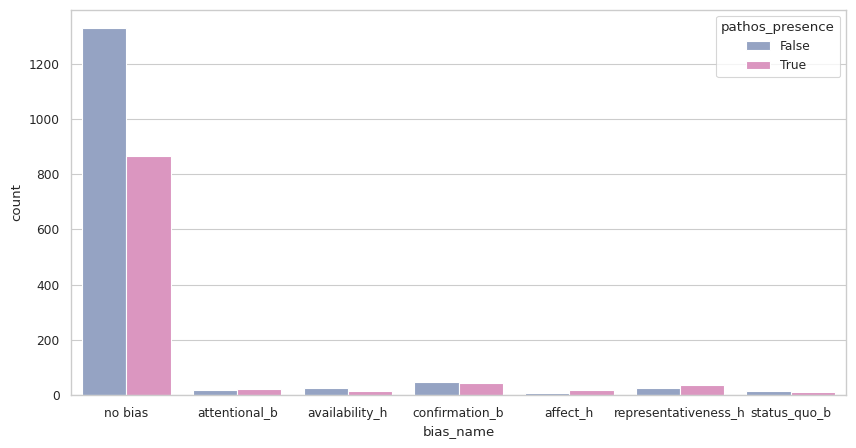

In [ ]:
plt.figure(figsize=(10,5))

crosstab_plot = sns.countplot(x='bias_name', data=df_copy, hue='pathos_presence', palette=['#8da0cb','#e78ac3'])

plt.show()

### Crosstab - presence of pathos and types of biases

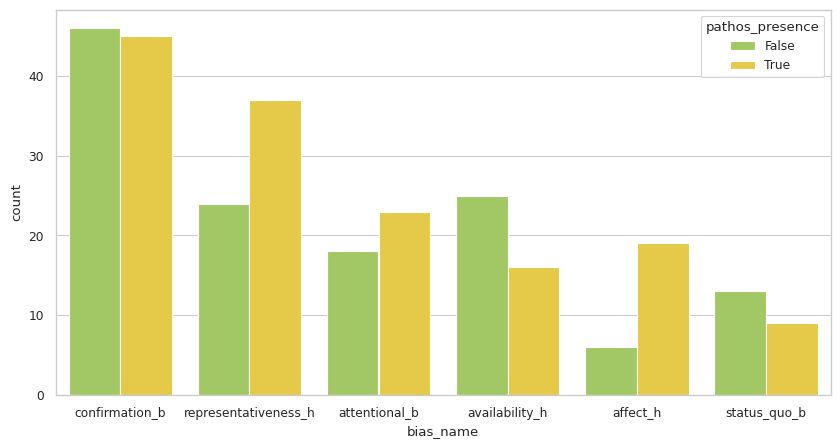

In [ ]:
plt.figure(figsize=(10,5))

crosstab_plot = sns.countplot(x='bias_name', order=df_copy['bias_name'].value_counts().iloc[1:].index, data=df_copy, hue='pathos_presence', palette=['#a6d854','#ffd92f'])

plt.show()


### Valence

In [ ]:
def pathos_valence(row):
  if (row['pathos_presence'] == True) & ((row['positive_valence']) > (row['negative_valence'])):
    value = 'positive'

  elif (row['pathos_presence'] == True) & ((row['positive_valence']) < (row['negative_valence'])):
    value= 'negative'

  else:
    value= 'no_pathos'
  return value

In [ ]:
df_copy['final_valence'] = df_copy.apply(pathos_valence, axis=1)

In [ ]:
df_copy

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
0,0,wxmvx9,dunkin1980,California to cover canal with solar panels in...,California to cover canal with solar panels in...,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
1,1,wxmvx9,snoovision,Excellent location for solar,Excellent location for solar,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,True,positive
2,2,wxmvx9,shanem,India has proven this out for many years.\n\nC...,India has proven this out for many years.\n\n,0.5,0.5,0.0,0.0,0.5,...,0,0,0,0,0,0,no bias,no_bias,True,no_pathos
3,3,wxmvx9,Carniboy,"good idea, next step ban the almonds, they are...","good idea, next step ban the almonds, they are...",0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,True,negative
4,7,ils717g,Medeski,While I know almonds are terrible for the amou...,While I know almonds are terrible for the amou...,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1002,1561325662329359872,PonsSublicius,@2CynicAl65 I'm (barely) old enough to remembe...,@2CynicAl65 I'm (barely) old enough to remembe...,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,1,0,confirmation_b,present_bias,True,negative
2473,1072,1561327010567361024,emublood,@LoyalTeddy1872 @MikeHudema The news is my mai...,@LoyalTeddy1872 @MikeHudema The news is my mai...,0.75,0.25,0.0,0.25,0.0,...,0,0,0,1,1,0,confirmation_b,present_bias,False,no_pathos
2474,1469,1563127334466507008,chris_surano,@GeraldKutney Is that the same type of science...,@GeraldKutney Is that the same type of science...,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,1,0,confirmation_b,present_bias,True,negative
2475,1556,1563128086563983104,ManthropologyUK,@Jannatu18076413 @GretaThunberg @SaleemulHuq2 ...,You blame MY generation 4 climate change yet w...,0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,1,0,confirmation_b,present_bias,True,negative


In [ ]:
df_copy['final_valence'].value_counts()

no_pathos    1534
negative      817
positive      126
Name: final_valence, dtype: int64

### Crosstab for valence

In [ ]:
valence_bias_crosstab = pd.crosstab(df_copy['final_valence'], df_copy['bias_name'])

In [ ]:
valence_bias_crosstab

bias_name,affect_h,attentional_b,availability_h,confirmation_b,no bias,representativeness_h,status_quo_b
final_valence,,,,,,,
negative,12,22,14,43,684,34,8
no_pathos,8,19,27,47,1394,25,14
positive,5,0,0,1,118,2,0


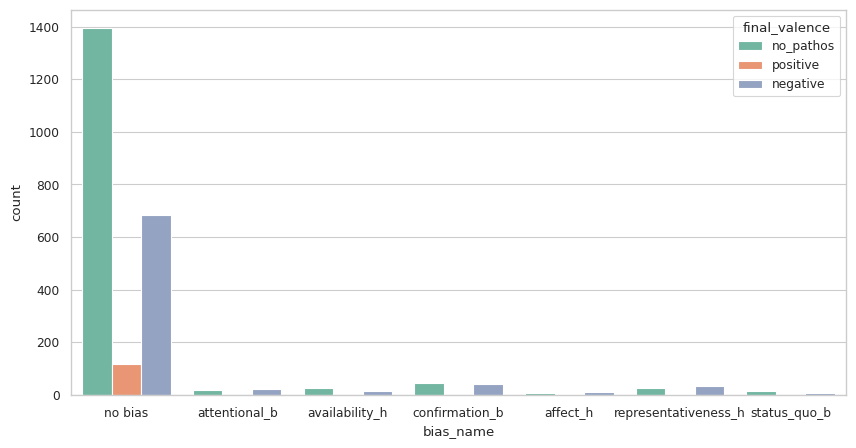

In [ ]:
plt.figure(figsize=(10,5))

crosstab_valence_plot = sns.countplot(x='bias_name', data=df_copy, hue='final_valence', palette=palette)

plt.show()

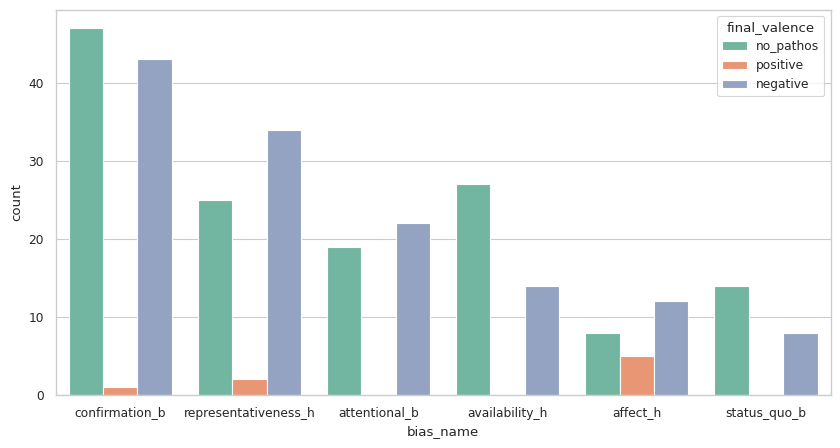

In [ ]:
plt.figure(figsize=(10,5))

crosstab_types_valence_plot = sns.countplot(x='bias_name', order=df_copy['bias_name'].value_counts().iloc[1:].index, data=df_copy, hue='final_valence', palette=palette)

plt.show()


# Word clouds

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [ ]:
sample_text = '@ellymelly https/hkjshks hello'

In [ ]:
def remove_users(post):
  post = re.sub(r'@[^\s]+','', post)
  post = re.sub(r'http[^\s]+','',post)
  return post

df_copy['full_text'] = df_copy['full_text'].apply(remove_users)

In [ ]:
text = " ".join(post for post in df_copy.full_text)

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['climate', 'change'])

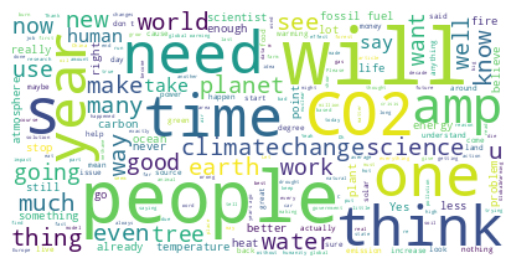

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

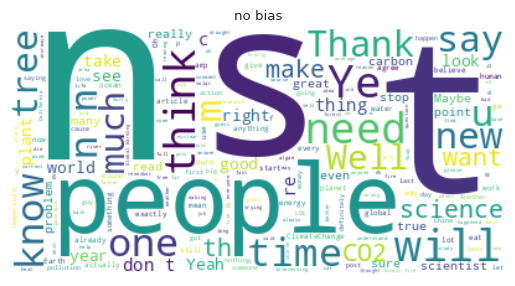

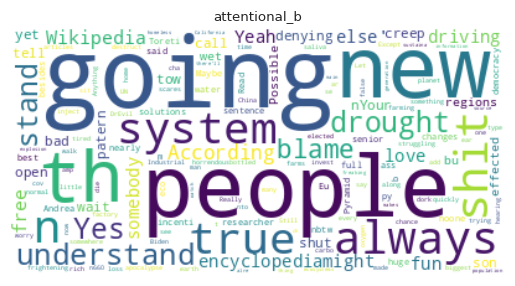

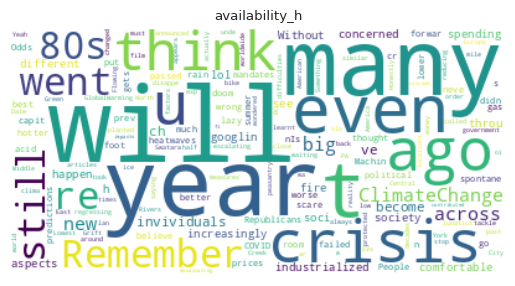

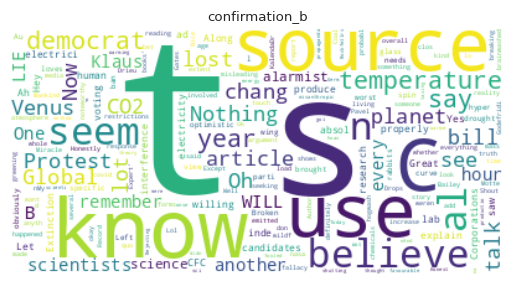

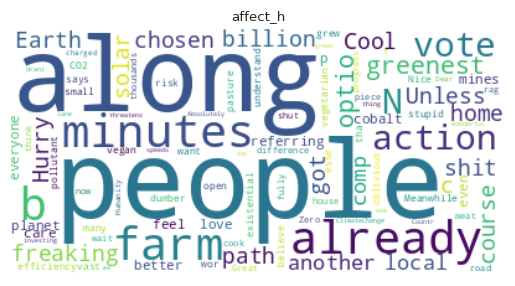

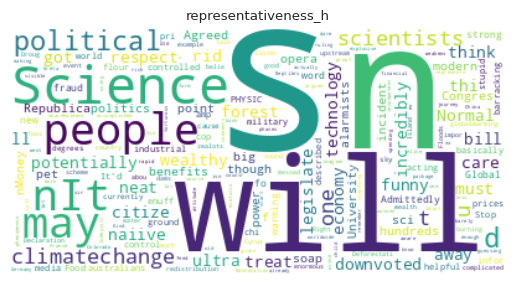

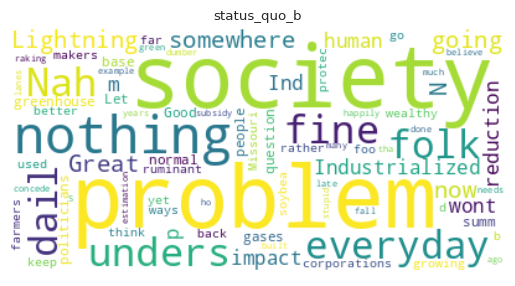

In [ ]:
for category in df_copy.bias_name.unique():

  text = df_copy.full_text[df_copy.bias_name == category].to_string()

  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(category)
  plt.axis("off")
  plt.show()

# Correlations

In [ ]:
from scipy.stats import chi2
import scipy.stats as stats

## Pathos and types of biases

In [ ]:
pathos_bias_crosstab

bias_name,affect_h,attentional_b,availability_h,confirmation_b,no bias,representativeness_h,status_quo_b
pathos_presence,,,,,,,
False,6,18,25,46,1329,24,13
True,19,23,16,45,867,37,9


In [ ]:
# Null hypothesis is the statement that our two variables are independent.
# The alternative hypothesis is the statement that they are not independent.

In [ ]:
chi, pval, dof, exp = stats.chi2_contingency(pathos_bias_crosstab)

In [ ]:
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)

print('chi=%.4f, critical value=%.4f\n' % (chi, critical_value))

if chi > critical_value:
    print('At a %.2f level of significance, the null hypothesis is rejected and we accept H1. They are not independent.' % (significance))
else:
    print('At a %.2f level of significance, we accept the null hypotheses. They are independent.' % (significance))

chi=31.1094, critical value=12.5916

At a 0.05 level of significance, the null hypothesis is rejected and we accept H1. They are not independent.


In [ ]:
print('p-value=%.4f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print('At a %.2f level of significance, the null hypothesis is rejected and we accept H1. They are not independent.' % (significance))
else:
    print('At a %.2f level of significance, we accept the null hypotheses. They are independent.' % (significance))

p-value=0.0000, significance=0.05

At a 0.05 level of significance, the null hypothesis is rejected and we accept H1. They are not independent.


In [ ]:
# V Cramer

n = pathos_bias_crosstab.sum().sum()
min_dimension = min(pathos_bias_crosstab.shape)-1

v = np.sqrt(chi/(n*min_dimension))

print('Cramer\'s V = %.4f' % (v))

Cramer's V = 0.1121


## Pathos and bias presence

In [ ]:
pathos_presence_bias_cross = pd.crosstab(df_copy['pathos_presence'], df_copy['bias_mapped'])

pathos_presence_bias_cross

bias_mapped,no_bias,present_bias
pathos_presence,,
False,1329,132
True,867,149


In [ ]:
chi, pval, dof, exp = stats.chi2_contingency(pathos_presence_bias_cross)

significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)

print('chi=%.4f, critical value=%.4f\n' % (chi, critical_value))

if chi > critical_value:
    print('At a %.2f level of significance, the null hypothesis is rejected and we accept H1. They are not independent.' % (significance))
else:
    print('At a %.2f level of significance, we accept the null hypotheses. They are independent.' % (significance))

chi=18.3337, critical value=3.8415

At a 0.05 level of significance, the null hypothesis is rejected and we accept H1. They are not independent.


In [ ]:
# Phi Yule
yule = np.sqrt(chi/n)

print('Phi Yule = %.4f' % (yule))

Phi Yule = 0.0860


## Valence and bias types

In [ ]:
chi, pval, dof, exp = stats.chi2_contingency(valence_bias_crosstab)

In [ ]:
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)

print('chi=%.4f, critical value=%.4f\n' % (chi, critical_value))

if chi > critical_value:
    print('At a %.2f level of significance, the null hypothesis is rejected and we accept H1. They are not independent.' % (significance))
else:
    print('At a %.2f level of significance, we accept the null hypotheses. They are independent.' % (significance))

chi=56.4283, critical value=21.0261

At a 0.05 level of significance, the null hypothesis is rejected and we accept H1. They are not independent.


In [ ]:
# V Cramer

sizes = pd.DataFrame(valence_bias_crosstab, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect'])
n = valence_bias_crosstab.sum().sum()
min_dimension = min(valence_bias_crosstab.shape)-1

v = np.sqrt(chi/(n*min_dimension))

print('Cramer\'s V = %.4f' % (v))

Cramer's V = 0.1067


# 2nd annotation analysis

## Preprocessing

In [ ]:
# 1st annotator's 100 instances
df_1st = df_copy[44:144]

In [ ]:
df_2nd = pd.read_excel('/content/drive/MyDrive/BA thesis/ClimateChange_2nd_annotated.xlsx')

df_2nd = df_2nd.fillna(0)
df_2nd = df_2nd.loc[:99]

df_2nd =df_2nd.replace('1?', float(1.0))

df_2nd[columns_to_check] =  df_2nd[columns_to_check].apply(pd.to_numeric, downcast ='signed')

In [ ]:
# summary column
df_2nd['bias_name'] = df_2nd[columns_to_check].apply(lambda row: next((col for col, val in row.items() if val == 1), 'no bias'), axis=1)

In [ ]:
# column bias/no bias

mapping = {'no bias':'no_bias',
           'affect_h':'present_bias',
           'availability_h': 'present_bias',
           'representativeness_h':'present_bias',
           'attentional_b':'present_bias',
           'confirmation_b':'present_bias',
           'status_quo_b':'present_bias'}

df_2nd['bias_mapped'] = df_2nd.bias_name.map(mapping)

## Checking if there are posts with more than 1 bias

In [ ]:
# checking if some posts include more than 1 bias and making copy

for index, row in df_1st.iterrows():
  indices = [col for col in columns_to_check if row[col] == 1]

  if len(indices) > 1:
    number_of_copies = len(indices) - 1

    while number_of_copies > 0:
      row_copy = row.copy()
      row_copy['bias_name'] = indices[-abs(number_of_copies)]
      df_1st = pd.concat([df_1st, row_copy.to_frame().T], ignore_index=True)

      number_of_copies -= 1

  indices = []

<ipython-input-64-ee390b32272f>:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_1st = pd.concat([df_1st, row_copy.to_frame().T], ignore_index=True)


In [ ]:
len(df_1st)

101

In [ ]:
doubled_df_1st = df_1st[100:]

doubled_df_1st

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
100,56,wim5qb,benderlax,I am freaking out about climate change. It is ...,Humanity is on the verge of being wiped out.,0.2,0.8,0.0,0.8,0.0,...,1,0,0,1,0,0,attentional_b,present_bias,True,negative


In [ ]:
# checking if some posts include more than 1 bias and making copy

for index, row in df_2nd.iterrows():
  indices = [col for col in columns_to_check if row[col] == 1]

  if len(indices) > 1:
    number_of_copies = len(indices) - 1

    while number_of_copies > 0:
      row_copy = row.copy()
      row_copy['bias_name'] = indices[-abs(number_of_copies)]
      df_2nd = pd.concat([df_2nd, row_copy.to_frame().T], ignore_index=True)

      number_of_copies -= 1

  indices = []

In [ ]:
len(df_2nd)

101

In [ ]:
doubled_df_2nd = df_2nd[100:]

doubled_df_2nd

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
100,146,iilmv1o,Lessmeatfortheplanet,They just started 3D printing food and I hones...,Don’t give up yet!,0.666667,0.333333,0.333333,0.0,0.0,...,/r/climatechange/comments/wdx4sz/climate_chang...,iinoxhg,1,1,0,0,0,0,availability_h,present_bias


## Comparisons of double-biased posts

## First comparison

In [ ]:
pd.set_option("display.max_colwidth", None)

doubled_df_1st.full_text

100    I am freaking out about climate change. It is scaring me. I would rather not see what becomes of this planet unless the greenhouse gases are reduced and humanity stops polluting. I am cycling between hope and despair at this point. This really is it. Humanity's luck is running out. It is now or never. Humanity is on the verge of being wiped out. The world is ending. Climate change is having an effect on me psychologically, but I try to remain optimistic.
Name: full_text, dtype: object

In [ ]:
doubled_df_1st

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
100,56,wim5qb,benderlax,"I am freaking out about climate change. It is scaring me. I would rather not see what becomes of this planet unless the greenhouse gases are reduced and humanity stops polluting. I am cycling between hope and despair at this point. This really is it. Humanity's luck is running out. It is now or never. Humanity is on the verge of being wiped out. The world is ending. Climate change is having an effect on me psychologically, but I try to remain optimistic.",Humanity is on the verge of being wiped out.,0.2,0.8,0.0,0.8,0.0,...,1,0,0,1,0,0,attentional_b,present_bias,True,negative


In [ ]:
double_row = df_2nd[df_2nd.full_text_id == 56]

double_row

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
5,56,wim5qb,benderlax,"I am freaking out about climate change. It is scaring me. I would rather not see what becomes of this planet unless the greenhouse gases are reduced and humanity stops polluting. I am cycling between hope and despair at this point. This really is it. Humanity's luck is running out. It is now or never. Humanity is on the verge of being wiped out. The world is ending. Climate change is having an effect on me psychologically, but I try to remain optimistic.",Humanity is on the verge of being wiped out.,0.2,0.8,0.0,0.8,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijj5lnb/,ijj5lnb,1,0,0,0,0,0,affect_h,present_bias


## Second comparison

In [ ]:
doubled_df_2nd.full_text

100    They just started 3D printing food and I honestly think that’s the way of the future. It solves both the detrimental effect of this mass amount of food production as well as crop failure. Don’t give up yet!
Name: full_text, dtype: object

In [ ]:
doubled_df_2nd

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
100,146,iilmv1o,Lessmeatfortheplanet,They just started 3D printing food and I honestly think that’s the way of the future. It solves both the detrimental effect of this mass amount of food production as well as crop failure. Don’t give up yet!,Don’t give up yet!,0.666667,0.333333,0.333333,0.0,0.0,...,/r/climatechange/comments/wdx4sz/climate_change_potential_to_end_humanity_is/iinoxhg/,iinoxhg,1,1,0,0,0,0,availability_h,present_bias


In [ ]:
double_row_2 = df_1st[df_1st.full_text_id == 146]

double_row_2

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
88,146,iilmv1o,Lessmeatfortheplanet,They just started 3D printing food and I honestly think that’s the way of the future. It solves both the detrimental effect of this mass amount of food production as well as crop failure. Don’t give up yet!,Don’t give up yet!,0.666667,0.333333,0.333333,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos


## Removing double-biased rows

In [ ]:
df_1st.drop(df_1st[(df_1st.full_text_id == 146) | (df_1st.full_text_id == 56)].index, inplace=True)

In [ ]:
len(df_1st)

98

In [ ]:
df_2nd.drop(df_2nd[(df_2nd.full_text_id == 146) | (df_2nd.full_text_id == 56)].index, inplace=True)

In [ ]:
len(df_2nd)

98

## Descriptive statistics

In [ ]:
df_1st.bias_name.value_counts()

no bias                 77
attentional_b            7
confirmation_b           6
availability_h           4
status_quo_b             3
representativeness_h     1
Name: bias_name, dtype: int64

In [ ]:
df_2nd.bias_name.value_counts()

no bias                 72
confirmation_b           6
affect_h                 6
status_quo_b             4
availability_h           4
representativeness_h     4
attentional_b            2
Name: bias_name, dtype: int64

In [ ]:
df_1st.bias_mapped.value_counts()

no_bias         77
present_bias    21
Name: bias_mapped, dtype: int64

In [ ]:
df_2nd.bias_mapped.value_counts()

no_bias         72
present_bias    26
Name: bias_mapped, dtype: int64

## Cohen's Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score

print('bias_mapped', cohen_kappa_score(df_1st['bias_mapped'], df_2nd['bias_mapped']))

bias_mapped 0.4143426294820717


In [ ]:
print('bias_name', cohen_kappa_score(df_1st['bias_name'], df_2nd['bias_name']))

bias_name 0.2609351432880843


In [ ]:
df_1st[columns_to_check] = df_1st[columns_to_check].astype(str)
df_2nd[columns_to_check] = df_2nd[columns_to_check].astype(str)

for column in columns_to_check:
   print(column, cohen_kappa_score(df_1st[column].values.flatten(), df_2nd[column].values.flatten()))

affect_h 0.0
availability_h 0.21808510638297873
representativeness_h -0.016597510373443924
attentional_b 0.42622950819672123
confirmation_b 0.1123188405797102
status_quo_b -0.03625377643504546


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

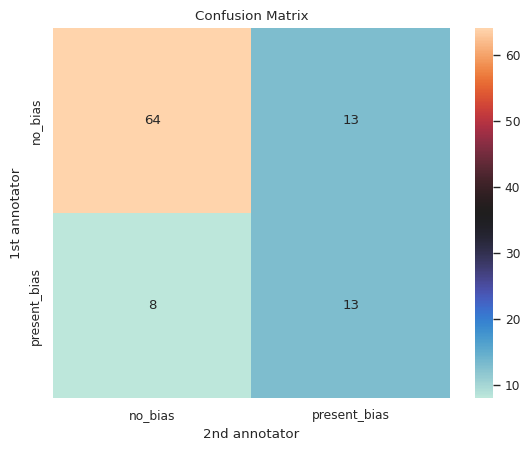

In [ ]:
cm = confusion_matrix(df_1st['bias_mapped'], df_2nd['bias_mapped'])

sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='icefire',
            xticklabels=['no_bias','present_bias'],
            yticklabels=['no_bias','present_bias'])

plt.ylabel('1st annotator')
plt.xlabel('2nd annotator')
plt.title('Confusion Matrix')
plt.show()

## Perfect agreement

In [ ]:
true_positive_1st = pd.DataFrame()

In [ ]:
for index, row in df_1st.iterrows():

  if df_1st.bias_mapped[index] == df_2nd.bias_mapped[index]=='present_bias':
    row_copy = row.copy()

    true_positive_1st = pd.concat([true_positive_1st, row_copy.to_frame().T], ignore_index=True)


true_positive_1st

,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
0,52,wim5qb,Andyinvesting,"I’ve become increasingly more concerned over the years. The last summer we had here was so extreme that it’s undeniable now. \nHumans would not survive these summers without power and running water. If it continues, animals and plants won’t survive. Then what?",Then what?,0.4,0.6,0.0,0.6,0.0,...,0,1,0,0,0,0,availability_h,present_bias,True,negative
1,53,wim5qb,Blue-Boar,"Yeah no we aren't, we might be driving into the literal apocalypse here and people don't give a shit or are to I'll informed to even understand it.","Yeah no we aren't, we might be driving into the literal apocalypse here and people don't give a shit or are to I'll informed to even understand it.",0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,attentional_b,present_bias,True,negative
2,55,wim5qb,all_is_love6667,"What I love is that it's always somebody else's fault.\n\nI feel responsible so I change my habits, but for most people, they just refuse because they have an excuse (complicated, I work hard, my neighbor does nothing) or they will accuse the rich. It's a prisoner dilemma.\n\nIndividualism at its finest. At this pace, authoritarian countries will achieve much more progress.\n\nEven during heatwaves, there is almost no sound of ""hey maybe we should change something?"". It's like God changed the weather.","Even during heatwaves, there is almost no sound of ""hey maybe we should change something?"".",0.285714,0.714286,0.0,0.714286,0.0,...,0,0,0,1,0,0,attentional_b,present_bias,True,negative
3,69,ijcnzr7,PaperTemplar,Have fun denying how bad shit is when your town run out of drinking water and fires burn down your house.,Have fun denying how bad shit is when your town run out of drinking water and fires burn down your house.,0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,attentional_b,present_bias,True,negative
4,87,iklgqnp,Lord_Farquaad95,How do these fire even happen. Without googling I recall wood requires 540°C to combust. How does this temperature happen without human interference?,How does this temperature happen without human interference?,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,availability_h,present_bias,False,no_pathos
5,90,ijeuafu,wobblyunionist,"Don't call me ""son"" you creep. \n\nYour paternalistic and reductive rhetoric is nauseating and tired. You ever see the meme of the dog in the burning house saying ""this is fine""? \n\n""Staying calm"" is for when you burn your waffles. There's a point of no return and we're at it. We should all be doing more to directly interrupt the status quo at this point",We should all be doing more to directly interrupt the status quo at this point,0.166667,0.833333,0.0,0.833333,0.0,...,0,0,0,1,0,0,attentional_b,present_bias,True,negative
6,91,ijco71d,MyBrainLied,Hey do you have a source for this? I was just talking with a friend and a relative and they did not believe me that the USA was the #1 contributor.,Hey do you have a source for this?,0.5,0.5,0.0,0.5,0.0,...,0,0,0,0,1,0,confirmation_b,present_bias,True,negative
7,94,ijcgapd,el_Bosco1,"It's not up to the everyday folk in their daily lives. It's about the very way or social and economic fabric were built. \n\nIndividual actions are mostly pointless, unfortunately.",It's not up to the everyday folk in their daily lives.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,status_quo_b,present_bias,False,no_pathos
8,106,ijdqv6w,mr_lab_mouse,"Corporations produce over 90% of climate change emissions. Meaningful change will only occur when industries are regulated properly. Passing the onus of responsibility to the consumer is negligent, misguided, and ineffective at best.\n\nIn the meantime, bugger off.",Corporations produce over 90% of climate change emissions.,0.75,0.25,0.0,0.25,0.0,...,0,0,0,0,1,0,confirmation

In [ ]:
true_positive_2nd = pd.DataFrame()

In [ ]:
for index, row in df_2nd.iterrows():

  if df_1st.bias_mapped[index] == df_2nd.bias_mapped[index]=='present_bias':
    row_copy = row.copy()

    true_positive_2nd = pd.concat([true_positive_2nd, row_copy.to_frame().T], ignore_index=True)


true_positive_2nd


,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
0,52,wim5qb,Andyinvesting,"I’ve become increasingly more concerned over the years. The last summer we had here was so extreme that it’s undeniable now. \nHumans would not survive these summers without power and running water. If it continues, animals and plants won’t survive. Then what?",Then what?,0.4,0.6,0.0,0.6,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijdshq1/,ijdshq1,0,1,0,0,0,0,availability_h,present_bias
1,53,wim5qb,Blue-Boar,"Yeah no we aren't, we might be driving into the literal apocalypse here and people don't give a shit or are to I'll informed to even understand it.","Yeah no we aren't, we might be driving into the literal apocalypse here and people don't give a shit or are to I'll informed to even understand it.",0.0,1.0,0.0,1.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijcitzj/,ijcitzj,0,0,0,1,0,0,attentional_b,present_bias
2,55,wim5qb,all_is_love6667,"What I love is that it's always somebody else's fault.\n\nI feel responsible so I change my habits, but for most people, they just refuse because they have an excuse (complicated, I work hard, my neighbor does nothing) or they will accuse the rich. It's a prisoner dilemma.\n\nIndividualism at its finest. At this pace, authoritarian countries will achieve much more progress.\n\nEven during heatwaves, there is almost no sound of ""hey maybe we should change something?"". It's like God changed the weather.","Even during heatwaves, there is almost no sound of ""hey maybe we should change something?"".",0.285714,0.714286,0.0,0.714286,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijgdprx/,ijgdprx,0,0,0,0,1,0,confirmation_b,present_bias
3,69,ijcnzr7,PaperTemplar,Have fun denying how bad shit is when your town run out of drinking water and fires burn down your house.,Have fun denying how bad shit is when your town run out of drinking water and fires burn down your house.,0.0,1.0,0.0,1.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijd9ftt/,ijd9ftt,0,0,0,1,0,0,attentional_b,present_bias
4,87,iklgqnp,Lord_Farquaad95,How do these fire even happen. Without googling I recall wood requires 540°C to combust. How does this temperature happen without human interference?,How does this temperature happen without human interference?,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/iklh7ce/,iklh7ce,0,0,1,0,0,0,representativeness_h,present_bias
5,90,ijeuafu,wobblyunionist,"Don't call me ""son"" you creep. \n\nYour paternalistic and reductive rhetoric is nauseating and tired. You ever see the meme of the dog in the burning house saying ""this is fine""? \n\n""Staying calm"" is for when you burn your waffles. There's a point of no return and we're at it. We should all be doing more to directly interrupt the status quo at this point",We should all be doing more to directly interrupt the status quo at this point,0.166667,0.833333,0.0,0.833333,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijg173q/,ijg173q,0,0,1,0,0,0,representativeness_h,present_bias
6,91,ijco71d,MyBrainLied,Hey do you have a source for this? I was just talking with a friend and a relative and they did not believe me that the USA was the #1 contributor.,Hey do you have a source for this?,0.5,0.5,0.0,0.5,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijcr7xh/,ijcr7xh,0,0,0,0,1,0,confirmation_b,present_bias
7,94,ijcgapd,el_Bosco1,"It's not up to the everyday folk in their daily lives. It's about the very way or social and economic fabric were built. \n\nIndividual actions are 

In [ ]:
summary_true_positive = pd.concat([true_positive_1st['full_text_id'], true_positive_1st['full_text'], true_positive_1st['bias_name'], true_positive_2nd['bias_name']], axis=1, keys=['Text ID', 'Full text', 'Name of bias 1st', 'Name of bias 2nd'])

In [ ]:
summary_true_positive

,Text ID,Full text,Name of bias 1st,Name of bias 2nd
0,52,"I’ve become increasingly more concerned over the years. The last summer we had here was so extreme that it’s undeniable now. \nHumans would not survive these summers without power and running water. If it continues, animals and plants won’t survive. Then what?",availability_h,availability_h
1,53,"Yeah no we aren't, we might be driving into the literal apocalypse here and people don't give a shit or are to I'll informed to even understand it.",attentional_b,attentional_b
2,55,"What I love is that it's always somebody else's fault.\n\nI feel responsible so I change my habits, but for most people, they just refuse because they have an excuse (complicated, I work hard, my neighbor does nothing) or they will accuse the rich. It's a prisoner dilemma.\n\nIndividualism at its finest. At this pace, authoritarian countries will achieve much more progress.\n\nEven during heatwaves, there is almost no sound of ""hey maybe we should change something?"". It's like God changed the weather.",attentional_b,confirmation_b
3,69,Have fun denying how bad shit is when your town run out of drinking water and fires burn down your house.,attentional_b,attentional_b
4,87,How do these fire even happen. Without googling I recall wood requires 540°C to combust. How does this temperature happen without human interference?,availability_h,representativeness_h
5,90,"Don't call me ""son"" you creep. \n\nYour paternalistic and reductive rhetoric is nauseating and tired. You ever see the meme of the dog in the burning house saying ""this is fine""? \n\n""Staying calm"" is for when you burn your waffles. There's a point of no return and we're at it. We should all be doing more to directly interrupt the status quo at this point",attentional_b,representativeness_h
6,91,Hey do you have a source for this? I was just talking with a friend and a relative and they did not believe me that the USA was the #1 contributor.,confirmation_b,confirmation_b
7,94,"It's not up to the everyday folk in their daily lives. It's about the very way or social and economic fabric were built. \n\nIndividual actions are mostly pointless, unfortunately.",status_quo_b,representativeness_h
8,106,"Corporations produce over 90% of climate change emissions. Meaningful change will only occur when industries are regulated properly. Passing the onus of responsibility to the consumer is negligent, misguided, and ineffective at best.\n\nIn the meantime, bugger off.",confirmation_b,availability_h
9,110,Lightning. Great now we are going somewhere. Now refer me to a paper that explains how lightning becomes more frequent due to whatever the climate change thing is.,status_quo_b,representativeness_h


## Disagreement

### Annotator 1: no bias; Annotator 2: present bias

In [ ]:
false_positive_1st = pd.DataFrame()

In [ ]:
for index, row in df_1st.iterrows():

  if (df_1st.bias_mapped[index] == 'no_bias') & (df_2nd.bias_mapped[index]=='present_bias'):
    row_copy = row.copy()

    false_positive_1st = pd.concat([false_positive_1st, row_copy.to_frame().T], ignore_index=True)


false_positive_1st


,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
0,51,wim5qb,x_Vellihousu_x,They already knew in the 70's that we will be screwed with this.\n\nPeople continued as usual.\n\nNow that we are starting to see the small portion of what could or will happen -> people are starting to wake up. Too late? Maybe.,They already knew in the 70's that we will be screwed with this.\n\n,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,True,negative
1,60,wim5qb,Lord_Farquaad95,You are already freaking out more than necessary. A single fire or some polluting event is nothing compared the the grand sceme of the planet. Ask yourself this; Are you concerned about the climate or about the environment?,You are already freaking out more than necessary.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
2,65,ijcbk7t,FineFleur,"Usa and Europe achieved their peak in carbon emissions in the 90' /20' (while increasing population and GDP).\n\nWe could have done better but we avoided the worst senario described by ""business as usual"" in the ipcc report.\n\nLet's continue and increase commitments, financing and communication. Let's not pursue negativism for the sake of it.",Usa and Europe achieved their peak in carbon emissions in the 90' /20' (while increasing population and GDP).,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
3,67,ijcbk7t,el_Bosco1,Are they? I don't believe so. It's still business as usual.,Are they?,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,True,negative
4,71,ijcnzr7,izzidora,"Last year an unprecedented heat wave killed hundreds of people in British Columbia and literally set a town on fire that burnt to the ground in 15 minutes. If you're not concerned, you're in need of medical help lol.","If you're not concerned, you're in need of medical help lol.",0.5,0.5,0.0,0.5,0.0,...,0,0,0,0,0,0,no bias,no_bias,True,negative
5,77,ijf43fx,AggroAce,"I’ve read opinion that without carbon capture technology, we can’t possibly hope for even remotely favourable outcomes. If we stopped CO2 emissions today, we would stay where we are as far as global temperatures.\n\n[Saved the comment](","I’ve read opinion that without carbon capture technology, we can’t possibly hope for even remotely favourable outcomes.",1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
6,78,ijcyhy2,livebanana,Even in the SSP2-4.5 scenario the median time when we'll hit 2 degrees warming is in 2050. I'm almost 10 years from retirement age by then. Definitely not a worry for the next generation.,Even in the SSP2-4.5 scenario the median time when we'll hit 2 degrees warming is in 2050.,0.666667,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
7,109,ijd79fg,deck_hand,"Why use STUPID analogies when we have data? Yeah, we're the biggest contributor, if you're only considering cumulative effects. I said that in my original comment.",Why use STUPID analogies when we have data?,0.666667,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
8,125,wdx4sz,algae_chat,Humans have an uncanny ability to adopt to the most hostile conditions on the planet.,Humans have an uncanny ability to adopt to the most hostile conditions on the planet.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos
9,134,iimoju8,Memetic1,We won't be living on the same planet for long. We are changing the planet to become something alien to most things that are alive today.,We won't be living on the same planet for long.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,no bias,no_bias,False,no_pathos


In [ ]:
false_positive_2nd = pd.DataFrame()

In [ ]:
for index, row in df_2nd.iterrows():

  if (df_1st.bias_mapped[index] == 'no_bias') & (df_2nd.bias_mapped[index]=='present_bias'):
    row_copy = row.copy()

    false_positive_2nd = pd.concat([false_positive_2nd, row_copy.to_frame().T], ignore_index=True)


false_positive_2nd.head()


,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
0,51,wim5qb,x_Vellihousu_x,They already knew in the 70's that we will be screwed with this.\n\nPeople continued as usual.\n\nNow that we are starting to see the small portion of what could or will happen -> people are starting to wake up. Too late? Maybe.,They already knew in the 70's that we will be screwed with this.\n\n,0.0,1.0,0.0,1.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijcbk7t/,ijcbk7t,0,0,0,0,0,1,status_quo_b,present_bias
1,60,wim5qb,Lord_Farquaad95,You are already freaking out more than necessary. A single fire or some polluting event is nothing compared the the grand sceme of the planet. Ask yourself this; Are you concerned about the climate or about the environment?,You are already freaking out more than necessary.,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ije408u/,ije408u,0,0,0,0,1,0,confirmation_b,present_bias
2,65,ijcbk7t,FineFleur,"Usa and Europe achieved their peak in carbon emissions in the 90' /20' (while increasing population and GDP).\n\nWe could have done better but we avoided the worst senario described by ""business as usual"" in the ipcc report.\n\nLet's continue and increase commitments, financing and communication. Let's not pursue negativism for the sake of it.",Usa and Europe achieved their peak in carbon emissions in the 90' /20' (while increasing population and GDP).,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijcifj1/,ijcifj1,0,0,0,0,1,0,confirmation_b,present_bias
3,67,ijcbk7t,el_Bosco1,Are they? I don't believe so. It's still business as usual.,Are they?,0.0,1.0,0.0,1.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijcbr9e/,ijcbr9e,0,0,0,0,0,1,status_quo_b,present_bias
4,71,ijcnzr7,izzidora,"Last year an unprecedented heat wave killed hundreds of people in British Columbia and literally set a town on fire that burnt to the ground in 15 minutes. If you're not concerned, you're in need of medical help lol.","If you're not concerned, you're in need of medical help lol.",0.5,0.5,0.0,0.5,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijfm6oy/,ijfm6oy,0,1,0,0,0,0,availability_h,present_bias


In [ ]:
summary_false_positive = pd.concat([false_positive_1st['full_text_id'], false_positive_1st['full_text'], false_positive_1st['bias_name'], false_positive_2nd['bias_name']], axis=1, keys=['Text ID', 'Full text', 'Name of bias 1st', 'Name of bias 2nd'])

In [ ]:
summary_false_positive

,Text ID,Full text,Name of bias 1st,Name of bias 2nd
0,51,They already knew in the 70's that we will be screwed with this.\n\nPeople continued as usual.\n\nNow that we are starting to see the small portion of what could or will happen -> people are starting to wake up. Too late? Maybe.,no bias,status_quo_b
1,60,You are already freaking out more than necessary. A single fire or some polluting event is nothing compared the the grand sceme of the planet. Ask yourself this; Are you concerned about the climate or about the environment?,no bias,confirmation_b
2,65,"Usa and Europe achieved their peak in carbon emissions in the 90' /20' (while increasing population and GDP).\n\nWe could have done better but we avoided the worst senario described by ""business as usual"" in the ipcc report.\n\nLet's continue and increase commitments, financing and communication. Let's not pursue negativism for the sake of it.",no bias,confirmation_b
3,67,Are they? I don't believe so. It's still business as usual.,no bias,status_quo_b
4,71,"Last year an unprecedented heat wave killed hundreds of people in British Columbia and literally set a town on fire that burnt to the ground in 15 minutes. If you're not concerned, you're in need of medical help lol.",no bias,availability_h
5,77,"I’ve read opinion that without carbon capture technology, we can’t possibly hope for even remotely favourable outcomes. If we stopped CO2 emissions today, we would stay where we are as far as global temperatures.\n\n[Saved the comment](",no bias,affect_h
6,78,Even in the SSP2-4.5 scenario the median time when we'll hit 2 degrees warming is in 2050. I'm almost 10 years from retirement age by then. Definitely not a worry for the next generation.,no bias,affect_h
7,109,"Why use STUPID analogies when we have data? Yeah, we're the biggest contributor, if you're only considering cumulative effects. I said that in my original comment.",no bias,status_quo_b
8,125,Humans have an uncanny ability to adopt to the most hostile conditions on the planet.,no bias,affect_h
9,134,We won't be living on the same planet for long. We are changing the planet to become something alien to most things that are alive today.,no bias,availability_h


### Annotator 1: present bias; Annotator 2: no bias

In [ ]:
false_negative_1st = pd.DataFrame()

In [ ]:
for index, row in df_1st.iterrows():

  if (df_1st.bias_mapped[index] == 'present_bias') & (df_2nd.bias_mapped[index] == 'no_bias'):
    row_copy = row.copy()

    false_negative_1st = pd.concat([false_negative_1st, row_copy.to_frame().T], ignore_index=True)


false_negative_1st


,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped,pathos_presence,final_valence
0,70,ijcnzr7,el_Bosco1,Nah.. I'm fine about it. It's all about understanding that's nothing else we (or I) can do about it and just enjoy it all you can while it lasts.,we (or I) can do about it and just enjoy it all you can while it lasts.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,status_quo_b,present_bias,False,no_pathos
1,89,ijfgnmq,SnarkLobster,I’ll be 90. \n\nIt’s funny I got downvoted for pointing out the fact that younger generations don’t vote in large numbers. Whatever. The under 40 crowd are the majority but it doesn’t matter because they mostly do not participate politically.,I’ll be 90.,0.25,0.75,0.0,0.75,0.0,...,0,0,1,0,0,0,representativeness_h,present_bias,True,negative
2,111,ikljrjy,Lord_Farquaad95,Ah... so there IS human interference? How does tossing a cigarette relate to climate change? 1 or 2°C is not gonna cut it. From the moment it leaves my fingers to the point it touches the ground it will have lost 50°C easily.,From the moment it leaves my fingers to the point it touches the ground it will have lost 50°C easily.,0.5,0.5,0.0,0.5,0.0,...,0,0,0,0,1,0,confirmation_b,present_bias,True,negative
3,114,iklli7m,Lord_Farquaad95,Great. Now explain to me how this 1°C is absolutely caused by humans and not simply the evolution of mother earth. Are we really the cause here?,Great.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,confirmation_b,present_bias,False,no_pathos
4,116,iklm7xh,Lord_Farquaad95,"I have to be open, yet you tell me to 'shut up'? You just pointed me to the home page of a government climate change website. If you can't come up with specific papers then I guess I got you.... This discussion is very old. There are many sings our climate is changing but is our tiny little civilisation really capable of influencing the monstrosity that mother earth is?",There are many sings our climate is changing but is our tiny little civilisation really capable of influencing the monstrosity that mother earth is?,0.8,0.2,0.0,0.2,0.0,...,0,0,0,1,0,0,attentional_b,present_bias,False,no_pathos
5,118,iklnewn,Lord_Farquaad95,I saw it. It talks about CFC's which were indeed very harmful to our atmosphere. A global effort has been made to stop the use of those and we can clearly see the 'hole' in our atmosphere closing. At this rate by 2040 damage done by CFC's should be completely reversed. Secondly it speaks about solar activity. which cannot fully explain current climate change. Notice the 'canniot FULLY'. So solar activity is a big factor in our equation. Solar activity is obviously not coused by humans. Let's inch closer and closer...,Let's inch closer and closer...,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,confirmation_b,present_bias,False,no_pathos
6,120,iklosct,Lord_Farquaad95,Yes like Venus. Let's do some research about the amount of CO2 nature releases (and absorbs) yearly and after that the relatively tiny amount humans release.,Yes like Venus.,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,confirmation_b,present_bias,False,no_pathos
7,137,iillb4a,Memetic1,"Just wait until regions are effected by wet bulb temperatures for a prolonged period of time. At a minimum massive amounts of wild life will perish in reality we may encounter entire towns/cities filled with the dead. Wild fires caused by the prolonged droughts we are experiencing are already a deadly existential crisis for some. Hunger is coming and it will knock on your door. You imagine that you are safe, but nowhere is really safe anymore. Not with the coming issues with fungal pandemics.","You imagine that you are safe, but nowhere is really safe anymore.",0.666667,0.333333,0.0,0.333333,0.0,...,0,0,0,1,0,0,attentional_b,present_bias,False,no_pathos


In [ ]:
false_negative_2nd = pd.DataFrame()

In [ ]:
for index, row in df_2nd.iterrows():

  if (df_1st.bias_mapped[index] == 'present_bias') & (df_2nd.bias_mapped[index] == 'no_bias'):
    row_copy = row.copy()

    false_negative_2nd = pd.concat([false_negative_2nd, row_copy.to_frame().T], ignore_index=True)


false_negative_2nd


,full_text_id,conversation_id,source,full_text,sentence,No_pathos,Contains_pathos,positive_valence,negative_valence,unsure,...,comment_url,comment_id,affect_h,availability_h,representativeness_h,attentional_b,confirmation_b,status_quo_b,bias_name,bias_mapped
0,70,ijcnzr7,el_Bosco1,Nah.. I'm fine about it. It's all about understanding that's nothing else we (or I) can do about it and just enjoy it all you can while it lasts.,we (or I) can do about it and just enjoy it all you can while it lasts.,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijcqam9/,ijcqam9,0,0,0,0,0,0,no bias,no_bias
1,89,ijfgnmq,SnarkLobster,I’ll be 90. \n\nIt’s funny I got downvoted for pointing out the fact that younger generations don’t vote in large numbers. Whatever. The under 40 crowd are the majority but it doesn’t matter because they mostly do not participate politically.,I’ll be 90.,0.25,0.75,0.0,0.75,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ijfvmmt/,ijfvmmt,0,0,0,0,0,0,no bias,no_bias
2,111,ikljrjy,Lord_Farquaad95,Ah... so there IS human interference? How does tossing a cigarette relate to climate change? 1 or 2°C is not gonna cut it. From the moment it leaves my fingers to the point it touches the ground it will have lost 50°C easily.,From the moment it leaves my fingers to the point it touches the ground it will have lost 50°C easily.,0.5,0.5,0.0,0.5,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/iklkips/,iklkips,0,0,0,0,0,0,no bias,no_bias
3,114,iklli7m,Lord_Farquaad95,Great. Now explain to me how this 1°C is absolutely caused by humans and not simply the evolution of mother earth. Are we really the cause here?,Great.,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ikllz6j/,ikllz6j,0,0,0,0,0,0,no bias,no_bias
4,116,iklm7xh,Lord_Farquaad95,"I have to be open, yet you tell me to 'shut up'? You just pointed me to the home page of a government climate change website. If you can't come up with specific papers then I guess I got you.... This discussion is very old. There are many sings our climate is changing but is our tiny little civilisation really capable of influencing the monstrosity that mother earth is?",There are many sings our climate is changing but is our tiny little civilisation really capable of influencing the monstrosity that mother earth is?,0.8,0.2,0.0,0.2,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/ikln9je/,ikln9je,0,0,0,0,0,0,no bias,no_bias
5,118,iklnewn,Lord_Farquaad95,I saw it. It talks about CFC's which were indeed very harmful to our atmosphere. A global effort has been made to stop the use of those and we can clearly see the 'hole' in our atmosphere closing. At this rate by 2040 damage done by CFC's should be completely reversed. Secondly it speaks about solar activity. which cannot fully explain current climate change. Notice the 'canniot FULLY'. So solar activity is a big factor in our equation. Solar activity is obviously not coused by humans. Let's inch closer and closer...,Let's inch closer and closer...,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/iklo98f/,iklo98f,0,0,0,0,0,0,no bias,no_bias
6,120,iklosct,Lord_Farquaad95,Yes like Venus. Let's do some research about the amount of CO2 nature releases (and absorbs) yearly and after that the relatively tiny amount humans release.,Yes like Venus.,1.0,0.0,0.0,0.0,0.0,...,/r/climatechange/comments/wim5qb/we_are_not_freaking_out_enough_about_climate/iklp9dt/,iklp9dt,0,0,0,0,0,0,no bias,no_bias
7,137,iillb4a,Memetic1,"Just wait until regions are effected by wet bulb temperatures for a prolonged period of time. At a minimum massive amounts of wild life will perish in reality we may encounter entire towns/cities filled with the dead. Wild fires caused by the prolonged droughts we are experienci

In [ ]:
summary_false_negative = pd.concat([false_negative_1st['full_text_id'], false_negative_1st['full_text'], false_negative_1st['bias_name'], false_negative_2nd['bias_name']], axis=1, keys=['Text ID', 'Full text', 'Name of bias 1st', 'Name of bias 2nd'])

In [ ]:
summary_false_negative

,Text ID,Full text,Name of bias 1st,Name of bias 2nd
0,70,Nah.. I'm fine about it. It's all about understanding that's nothing else we (or I) can do about it and just enjoy it all you can while it lasts.,status_quo_b,no bias
1,89,I’ll be 90. \n\nIt’s funny I got downvoted for pointing out the fact that younger generations don’t vote in large numbers. Whatever. The under 40 crowd are the majority but it doesn’t matter because they mostly do not participate politically.,representativeness_h,no bias
2,111,Ah... so there IS human interference? How does tossing a cigarette relate to climate change? 1 or 2°C is not gonna cut it. From the moment it leaves my fingers to the point it touches the ground it will have lost 50°C easily.,confirmation_b,no bias
3,114,Great. Now explain to me how this 1°C is absolutely caused by humans and not simply the evolution of mother earth. Are we really the cause here?,confirmation_b,no bias
4,116,"I have to be open, yet you tell me to 'shut up'? You just pointed me to the home page of a government climate change website. If you can't come up with specific papers then I guess I got you.... This discussion is very old. There are many sings our climate is changing but is our tiny little civilisation really capable of influencing the monstrosity that mother earth is?",attentional_b,no bias
5,118,I saw it. It talks about CFC's which were indeed very harmful to our atmosphere. A global effort has been made to stop the use of those and we can clearly see the 'hole' in our atmosphere closing. At this rate by 2040 damage done by CFC's should be completely reversed. Secondly it speaks about solar activity. which cannot fully explain current climate change. Notice the 'canniot FULLY'. So solar activity is a big factor in our equation. Solar activity is obviously not coused by humans. Let's inch closer and closer...,confirmation_b,no bias
6,120,Yes like Venus. Let's do some research about the amount of CO2 nature releases (and absorbs) yearly and after that the relatively tiny amount humans release.,confirmation_b,no bias
7,137,"Just wait until regions are effected by wet bulb temperatures for a prolonged period of time. At a minimum massive amounts of wild life will perish in reality we may encounter entire towns/cities filled with the dead. Wild fires caused by the prolonged droughts we are experiencing are already a deadly existential crisis for some. Hunger is coming and it will knock on your door. You imagine that you are safe, but nowhere is really safe anymore. Not with the coming issues with fungal pandemics.",attentional_b,no bias


## Accuracy

In [ ]:
# accuracy for the column 'bias_mapped'
accuracy_bias_mapped = accuracy_score(df_1st['bias_mapped'], df_2nd['bias_mapped'])

print('Accuracy for bias_mapped:', accuracy_bias_mapped)


# accuracy for the column 'bias_name'
accuracy_bias_name = accuracy_score(df_1st['bias_name'], df_2nd['bias_name'])

print('Accuracy for bias_name:', accuracy_bias_name)


# accuracy for each bias:

for column in columns_to_check:
   print(column, accuracy_score(df_1st[column].values.flatten(), df_2nd[column].values.flatten()))

Accuracy for bias_mapped: 0.7857142857142857
Accuracy for bias_name: 0.6938775510204082
affect_h 0.9387755102040817
availability_h 0.9387755102040817
representativeness_h 0.9489795918367347
attentional_b 0.9489795918367347
confirmation_b 0.8979591836734694
status_quo_b 0.9285714285714286


## Precision

In [ ]:
# precision for the column 'bias_mapped'
precision_bias_mapped = precision_score(df_1st['bias_mapped'], df_2nd['bias_mapped'], pos_label='present_bias')

print('Precision for bias_mapped:', precision_bias_mapped)


# precision for the column 'bias_name'
precision_bias_name = precision_score(df_1st['bias_name'], df_2nd['bias_name'], average='weighted')

print('Precision for bias_name:', precision_bias_name)


# precision for each bias:
for column in columns_to_check:
   print(column, precision_score(df_1st[column].values.flatten(), df_2nd[column].values.flatten(), average='weighted'))

Precision for bias_mapped: 0.5
Precision for bias_name: 0.7902494331065759
affect_h 1.0
availability_h 0.9387755102040817
representativeness_h 0.9792661745549285
attentional_b 0.9516369047619047
confirmation_b 0.8979591836734694
status_quo_b 0.9384498480243162


## F1-score

In [ ]:
# f1_score for the column 'bias_mapped'
f1_score_bias_mapped = f1_score(df_1st['bias_mapped'], df_2nd['bias_mapped'], pos_label='present_bias')

print('F1-score for bias_mapped:', f1_score_bias_mapped)


# f1_score for the column 'bias_name'
f1_score_bias_name = f1_score(df_1st['bias_name'], df_2nd['bias_name'], average='weighted')

print('F1-score for bias_name:', f1_score_bias_name)


# f1_score for each bias:

for column in columns_to_check:
   print(column, f1_score(df_1st[column].values.flatten(), df_2nd[column].values.flatten(), average='weighted'))

F1-score for bias_mapped: 0.5531914893617021
F1-score for bias_name: 0.7271302256920666
affect_h 0.968421052631579
availability_h 0.9387755102040817
representativeness_h 0.9638850304519715
attentional_b 0.9354893472540531
confirmation_b 0.8979591836734694
status_quo_b 0.9334845049130763


## Recall

In [ ]:
# recall for the column 'bias_mapped'
recall_bias_mapped = recall_score(df_1st['bias_mapped'], df_2nd['bias_mapped'], pos_label='present_bias')

print('Recall for bias_mapped:', recall_bias_mapped)


# recall f1_scorefor the column 'bias_name'
recall_bias_name = recall_score(df_1st['bias_name'], df_2nd['bias_name'], average='weighted', zero_division=0)

print('Recall for bias_name:', recall_bias_name)


# recall for each bias:

for column in columns_to_check:
   print(column, recall_score(df_1st[column].values.flatten(), df_2nd[column].values.flatten(), average='weighted', zero_division=0))

Recall for bias_mapped: 0.6190476190476191
Recall for bias_name: 0.6938775510204082
affect_h 0.9387755102040817
availability_h 0.9387755102040817
representativeness_h 0.9489795918367347
attentional_b 0.9489795918367347
confirmation_b 0.8979591836734694
status_quo_b 0.9285714285714286
